# تطبيق تقنيات الثكثل مع تطبيع البيانات

#  **1.Dataset Analysis**

In [1]:
# import cell
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN,MiniBatchKMeans,SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.stats import norm 
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import rand_score
import seaborn as sn

## 1.1 Load the Data

In [2]:
data = pd.read_csv("BC.csv") 
data.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0


# **2.Data Preprocessing**

## 2.1 Assess Missing Data

In [3]:
data.isnull().any()

Sex          False
Age          False
Adress       False
FBS          False
Urea         False
Creatinin    False
ALB          False
TCa          False
GPT          False
GOT          False
ALP          False
CA15         False
CEA          False
WBC          False
RBC          False
HGB          False
PLT          False
ESR          False
LDH          False
Na           False
K            False
CL           False
CLASS        False
dtype: bool

## 2.2 Convert Missing Value Codes to NaNs

In [4]:
import numpy as np
data.replace('?', np.NaN)

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,1
2431,1,47,Sabha,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,1
2432,1,43,Sabha,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,1
2433,1,60,Sabha,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,1


# LabelEncoder for object featurs

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.columns.tolist()
for column in cols:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [6]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,1
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,1
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,1
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,1


## 2.3 Normalize the Data

### Data Preparation 

In [7]:
# split the data 
X = data.drop(['CLASS'], axis=1)
y = data['CLASS']
y

0       0
1       0
2       0
3       0
4       0
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
Name: CLASS, Length: 2435, dtype: int64

### Normilzation using normilze function 

In [8]:
d1 = preprocessing.normalize(X, axis=0)
scaled_data_nor = pd.DataFrame(d1, columns=X.columns)
scaled_data_nor.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,0.01996,0.023996,0.028564,0.012920,0.010088,0.007963,0.010396,0.020076,0.008798,0.004427,...,0.013568,0.007056,0.010996,0.026166,0.011084,0.009735,0.012000,0.019183,0.013363,0.020244
1,0.01996,0.021196,0.022613,0.024548,0.011843,0.005972,0.012842,0.018671,0.004839,0.007526,...,0.000421,0.009131,0.011952,0.024408,0.008766,0.010430,0.020801,0.018415,0.012383,0.020112
2,0.01996,0.019997,0.022613,0.019380,0.006579,0.010949,0.010701,0.017065,0.005719,0.004427,...,0.004137,0.010583,0.010661,0.026947,0.017645,0.010430,0.013520,0.018521,0.011878,0.018921
3,0.01996,0.014398,0.020233,0.010336,0.008772,0.009954,0.012842,0.016061,0.003079,0.005755,...,0.010938,0.006433,0.010351,0.020894,0.011989,0.006953,0.011040,0.018045,0.012056,0.020244
4,0.01996,0.011998,0.020233,0.010336,0.017544,0.007963,0.009173,0.019072,0.003959,0.006641,...,0.004382,0.008716,0.009873,0.024018,0.013742,0.003477,0.012320,0.018825,0.011878,0.020074


### Normilzation using MinMaxScaler 

In [9]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 4))
d2 = scaler.fit_transform(X)
scaled_data_minmax = pd.DataFrame(d2, columns=X.columns)
scaled_data_minmax.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,0.0,2.208955,3.310345,0.447427,0.307692,0.178571,0.790123,1.881081,0.406780,0.172973,...,1.204368,0.434783,0.471368,3.09375,0.685714,0.489796,0.432692,0.981387,0.747182,3.056115
1,0.0,1.791045,2.620690,1.252796,0.395604,0.107143,0.987654,1.729730,0.203390,0.324324,...,0.034321,0.652174,0.519590,2.81250,0.373333,0.530612,1.490385,0.850536,0.676329,3.015827
2,0.0,1.611940,2.620690,0.894855,0.131868,0.285714,0.814815,1.556757,0.248588,0.172973,...,0.365055,0.804348,0.454491,3.21875,1.569524,0.530612,0.615385,0.868584,0.639828,2.653237
3,0.0,0.776119,2.344828,0.268456,0.241758,0.250000,0.987654,1.448649,0.112994,0.237838,...,0.970359,0.369565,0.438819,2.25000,0.807619,0.326531,0.317308,0.787366,0.652711,3.056115
4,0.0,0.417910,2.344828,0.268456,0.681319,0.178571,0.691358,1.772973,0.158192,0.281081,...,0.386895,0.608696,0.414708,2.75000,1.043810,0.122449,0.471154,0.920474,0.639828,3.004317


### Normlization using StandardScaler

In [10]:
scaler = StandardScaler()
d3 = scaler.fit_transform(X)
scaled_data_std = pd.DataFrame(d3, columns=X.columns)
scaled_data_std.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,-0.10185,0.937085,1.226336,-0.664141,-0.665932,-0.546099,-0.747536,0.053055,-0.551968,-0.933360,...,-0.220881,-1.456939,-0.720147,1.228814,-1.392177,-0.426068,-1.469290,-0.317190,-0.443937,0.015816
1,-0.10185,0.318806,0.497905,0.728542,-0.501924,-0.695270,-0.498261,-0.296645,-0.863996,-0.683762,...,-1.305956,-1.195953,-0.620027,0.903231,-1.781711,-0.373444,0.233288,-0.591200,-0.543677,-0.086455
2,-0.10185,0.053830,0.497905,0.109572,-0.993947,-0.322343,-0.716377,-0.696303,-0.794657,-0.933360,...,-0.999241,-1.013264,-0.755189,1.373518,-0.290082,-0.373444,-1.175208,-0.553405,-0.595059,-1.006896
3,-0.10185,-1.182728,0.206533,-0.973626,-0.788938,-0.396929,-0.498261,-0.946089,-1.002676,-0.826389,...,-0.437896,-1.535235,-0.787728,0.252064,-1.240164,-0.636562,-1.655026,-0.723481,-0.576924,0.015816
4,-0.10185,-1.712681,0.206533,-0.973626,0.031101,-0.546099,-0.872174,-0.196731,-0.933336,-0.755075,...,-0.978987,-1.248151,-0.837788,0.830879,-0.945639,-0.899681,-1.407378,-0.444746,-0.595059,-0.115675


# **3.Clustring**

## 3.1 K-means Clustering

In [11]:
kmeans = KMeans(n_clusters=2, init= "random",max_iter = 300, random_state = 1, n_init = 10)
   

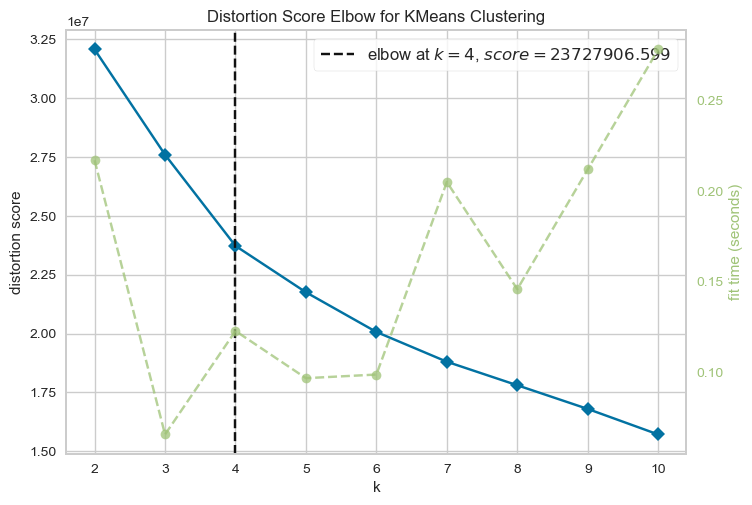

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KElbowVisualizer(kmeans, k=10)
model.fit(X)
model.show()

In [13]:
kmeans.fit(scaled_data_std)
data['kmeans'] = kmeans.labels_
kmeans.labels_

array([6, 3, 1, ..., 3, 6, 6])

In [14]:
data['kmeans'] = kmeans.labels_
data.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,RBC,HGB,PLT,ESR,LDH,Na,K,CL,CLASS,kmeans
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,4.60,13.4,196,14,150,145.0,4.50,107.1,0,6
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,5.00,12.5,155,15,260,139.2,4.17,106.4,0,3
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,4.46,13.8,312,15,169,140.0,4.00,100.1,0,1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,4.33,10.7,212,10,138,136.4,4.06,107.1,0,1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.13,12.3,243,5,154,142.3,4.00,106.2,0,1


<AxesSubplot:xlabel='kmeans', ylabel='FBS'>

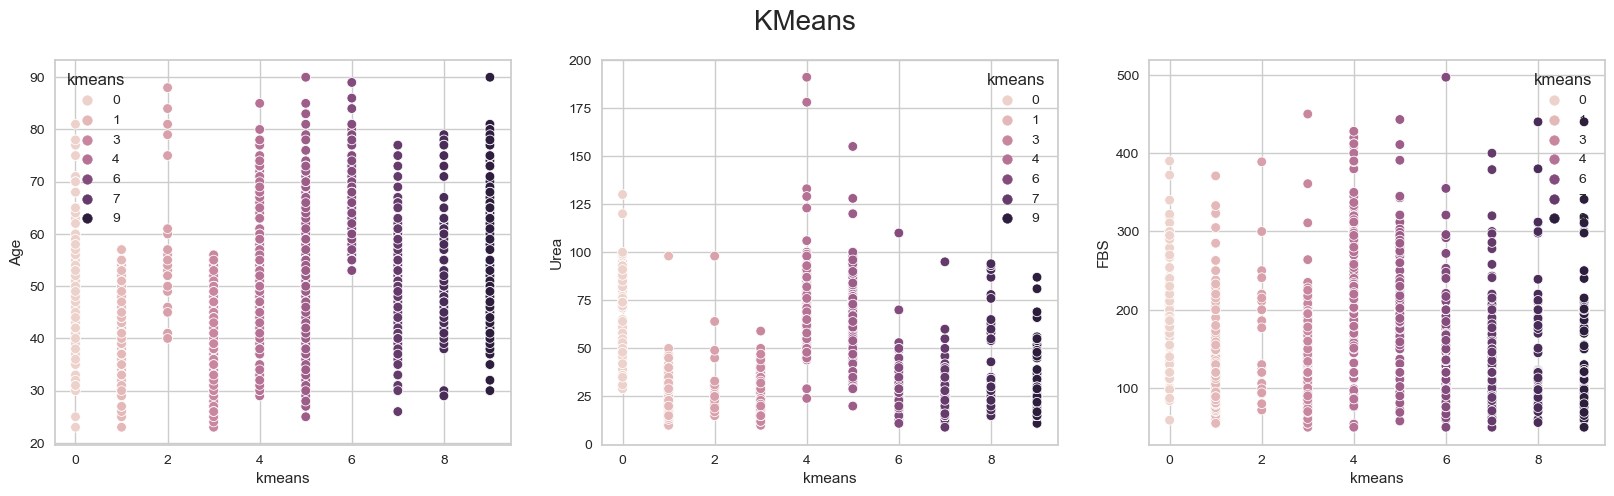

In [15]:
# K-Means Result

plt.figure(figsize=(20, 5))

plt.suptitle('KMeans', fontsize=20)

plt.subplot(1, 3, 1)
sns.scatterplot(x=data.iloc[:,23], y=data.iloc[:,1], hue=data['kmeans'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=data.iloc[:,23], y=data.iloc[:,4], hue=data['kmeans'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=data.iloc[:,23], y=data.iloc[:,3], hue=data['kmeans'])

## 3.2 Hierarchical Clustring

In [16]:
agglom = AgglomerativeClustering(n_clusters = 2, linkage = 'average')

In [17]:
agglom.fit(scaled_data_std,y)
data['agglom'] = agglom.labels_
agglom.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
data['Hierarchical'] = agglom.labels_
data.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,PLT,ESR,LDH,Na,K,CL,CLASS,kmeans,agglom,Hierarchical
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,196,14,150,145.0,4.50,107.1,0,6,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,155,15,260,139.2,4.17,106.4,0,3,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,312,15,169,140.0,4.00,100.1,0,1,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,212,10,138,136.4,4.06,107.1,0,1,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,243,5,154,142.3,4.00,106.2,0,1,0,0


In [17]:
dist_matrix = distance_matrix(scaled_data_std,scaled_data_std)# compute the distances between features

In [18]:
plt.rcParams["figure.figsize"] = (30,10)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_10152\2417520722.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


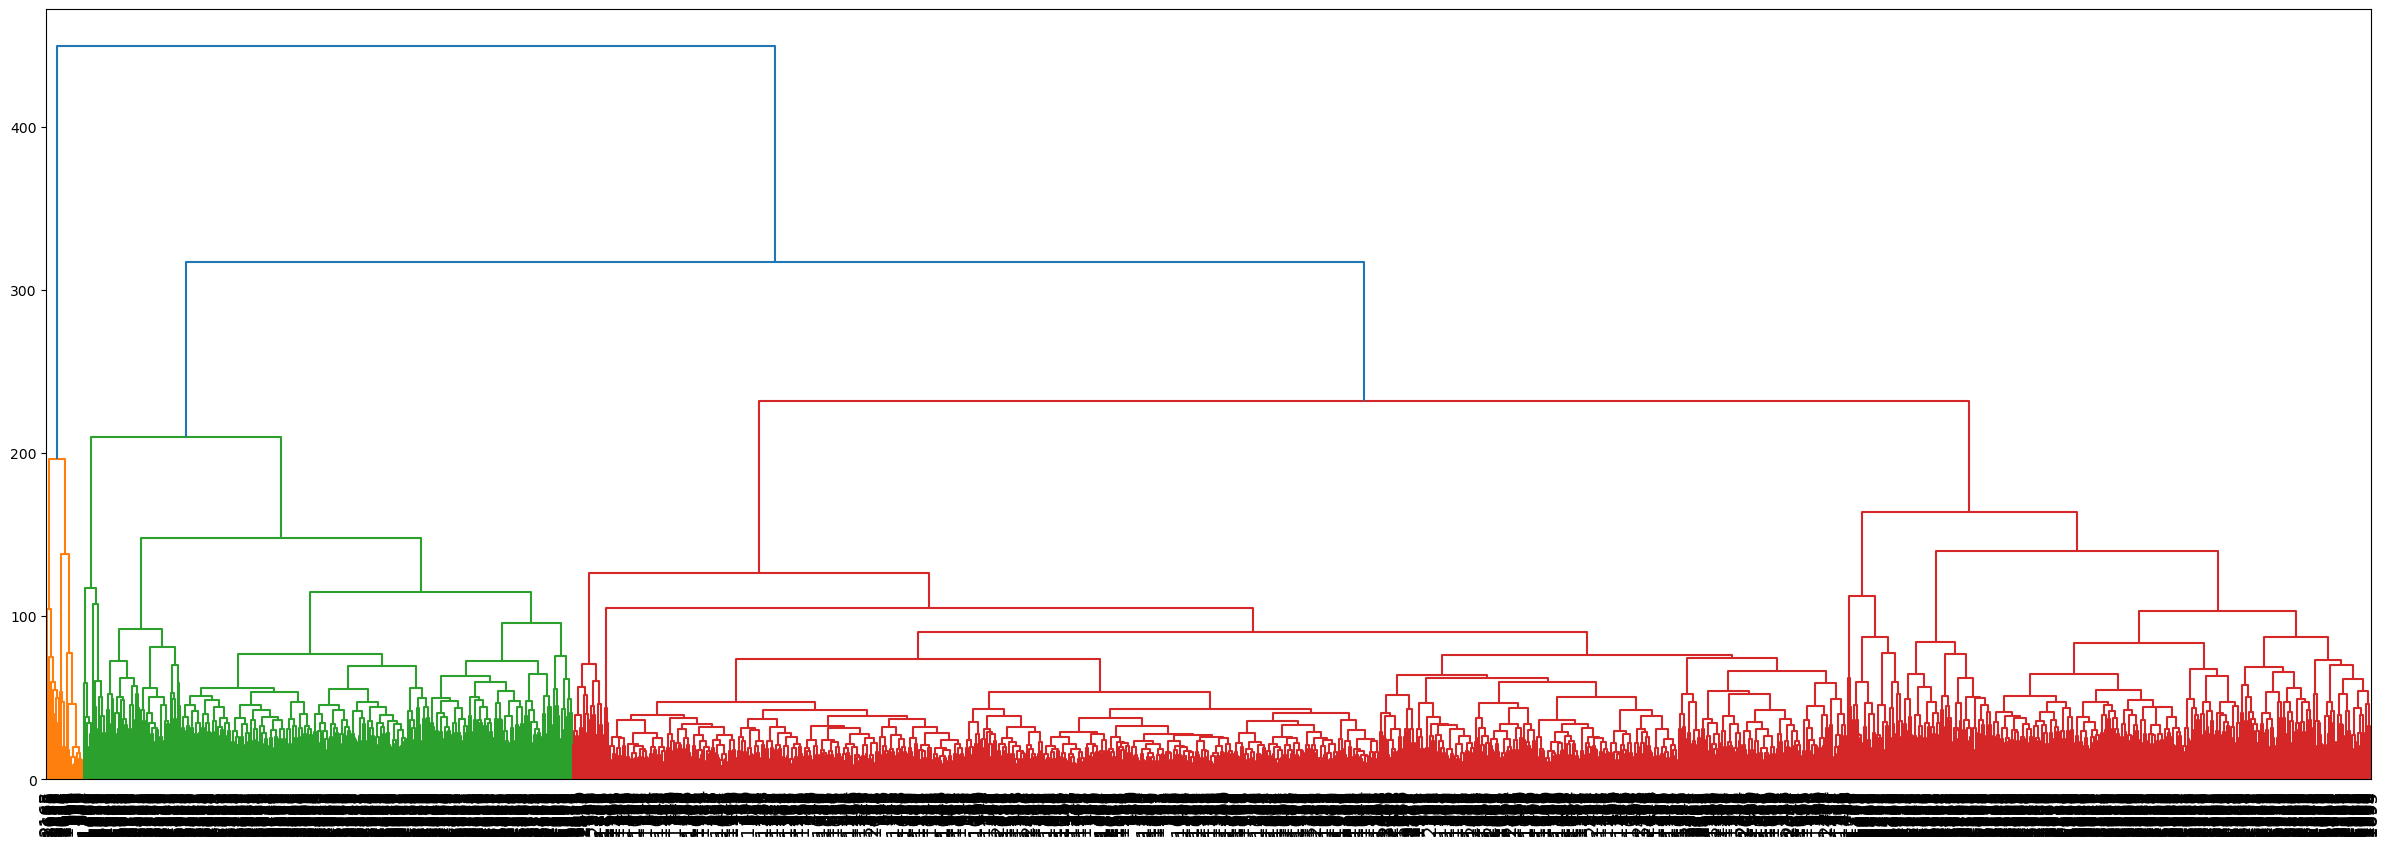

In [19]:
Z = hierarchy.linkage(dist_matrix, 'complete')
dendro = hierarchy.dendrogram(Z,leaf_font_size = 13)
plt.grid(False)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_10152\3189925406.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


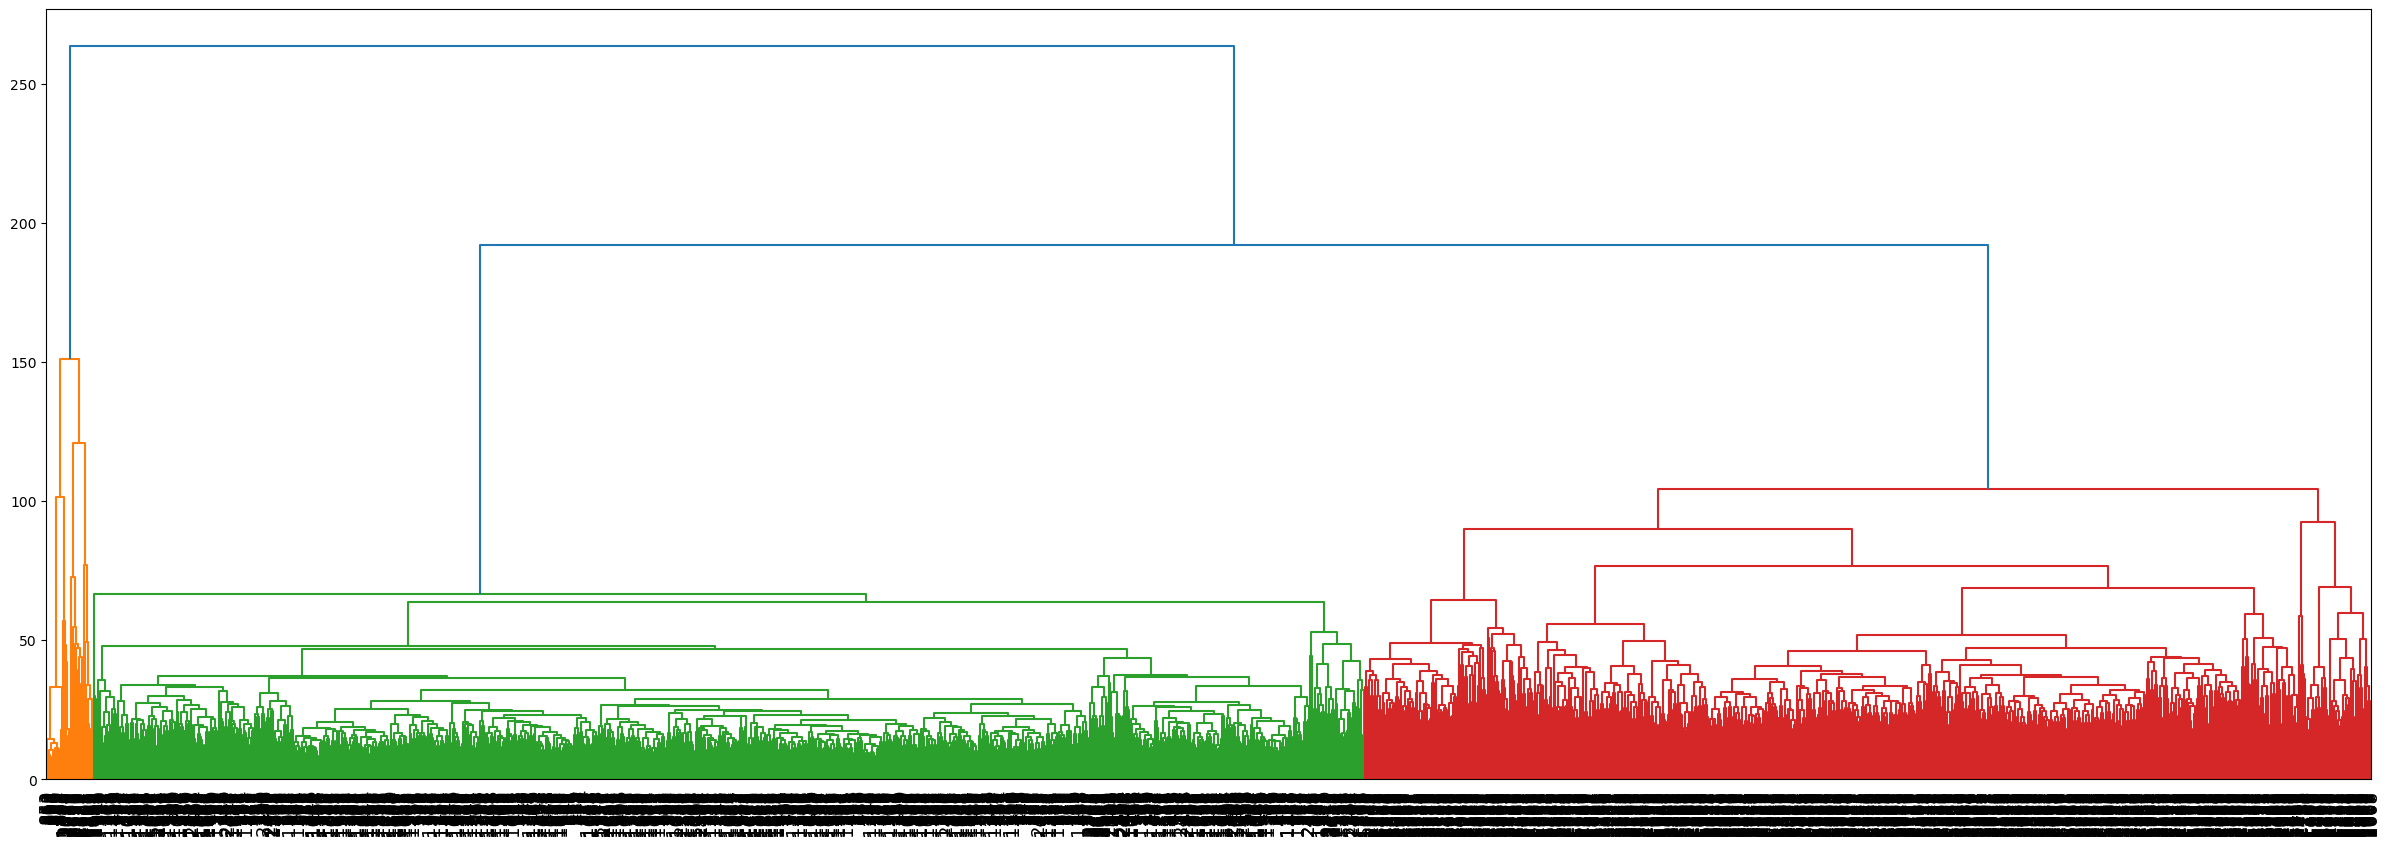

In [20]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z,leaf_font_size = 13)
plt.grid(False)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_10152\1455492561.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'single')


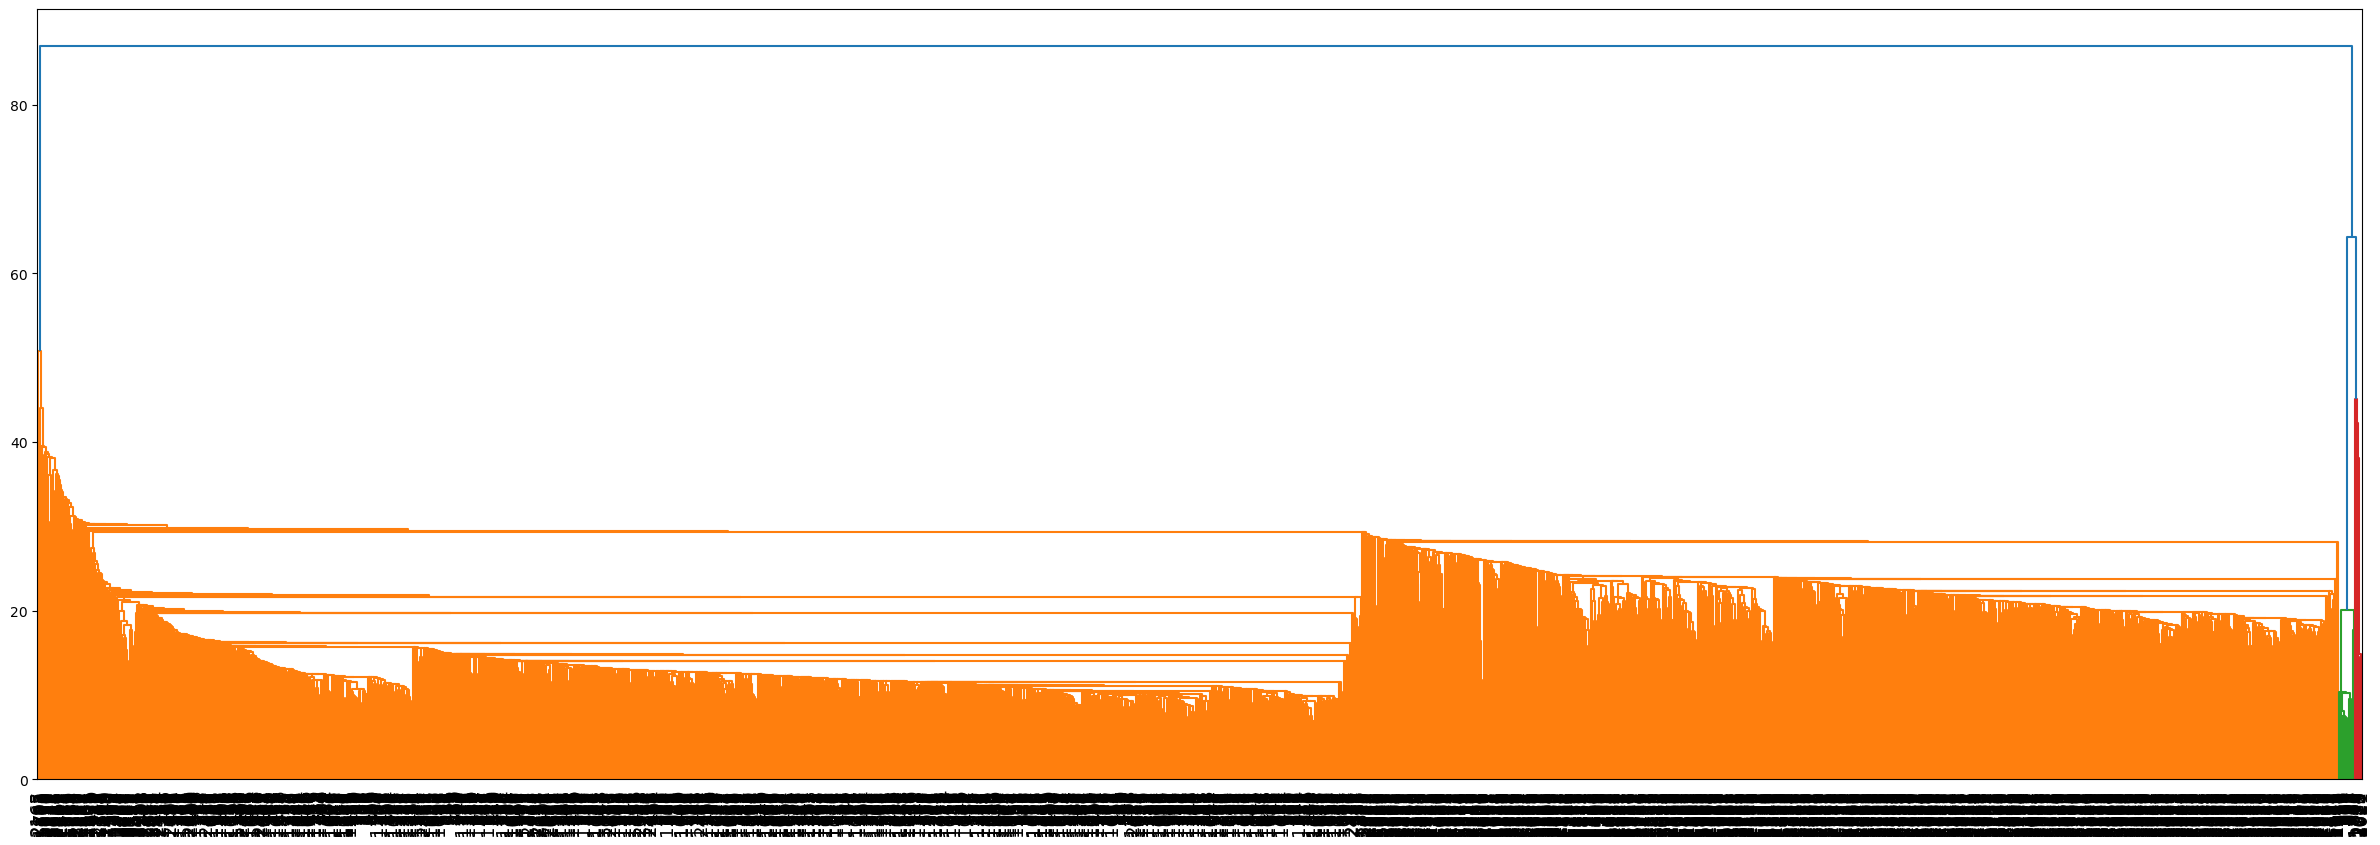

In [21]:
Z = hierarchy.linkage(dist_matrix, 'single')
dendro = hierarchy.dendrogram(Z,leaf_font_size = 13)
plt.grid(False)

C:\Users\TOSHIBA\AppData\Local\Temp\ipykernel_10152\3063277720.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'centroid')


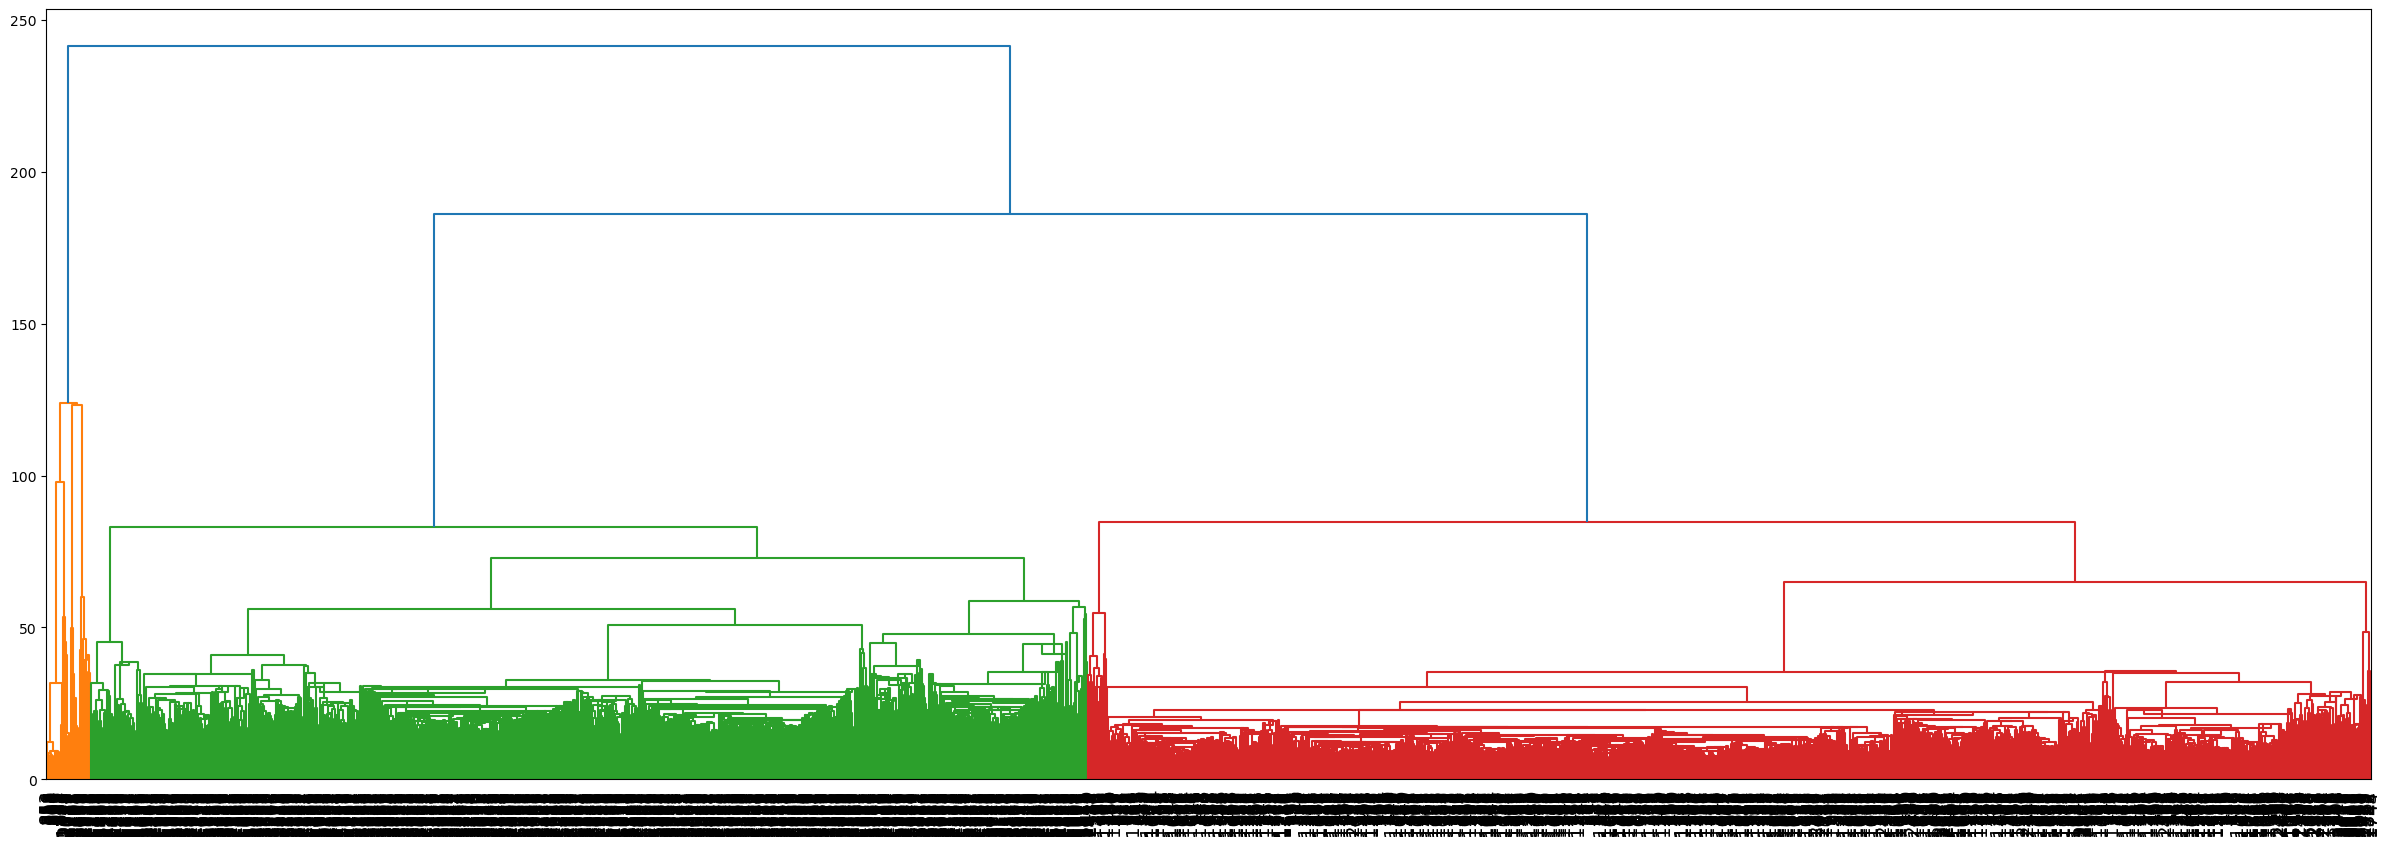

In [22]:
Z = hierarchy.linkage(dist_matrix, 'centroid')
dendro = hierarchy.dendrogram(Z,leaf_font_size = 13)
plt.grid(False)

In [23]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

## 3.3 Density-Based Clustering (DBSCN)

In [19]:
epsilon = 4
minimumSamples = 6
db_labels = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(scaled_data_std)
data['db'] = db_labels.labels_
db_labels.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
data['DBSCN'] = db_labels.labels_
data.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,LDH,Na,K,CL,CLASS,kmeans,agglom,Hierarchical,db,DBSCN
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,150,145.0,4.50,107.1,0,6,0,0,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,260,139.2,4.17,106.4,0,3,0,0,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,169,140.0,4.00,100.1,0,1,0,0,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,138,136.4,4.06,107.1,0,1,0,0,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,154,142.3,4.00,106.2,0,1,0,0,0,0


<AxesSubplot:xlabel='Age', ylabel='FBS'>

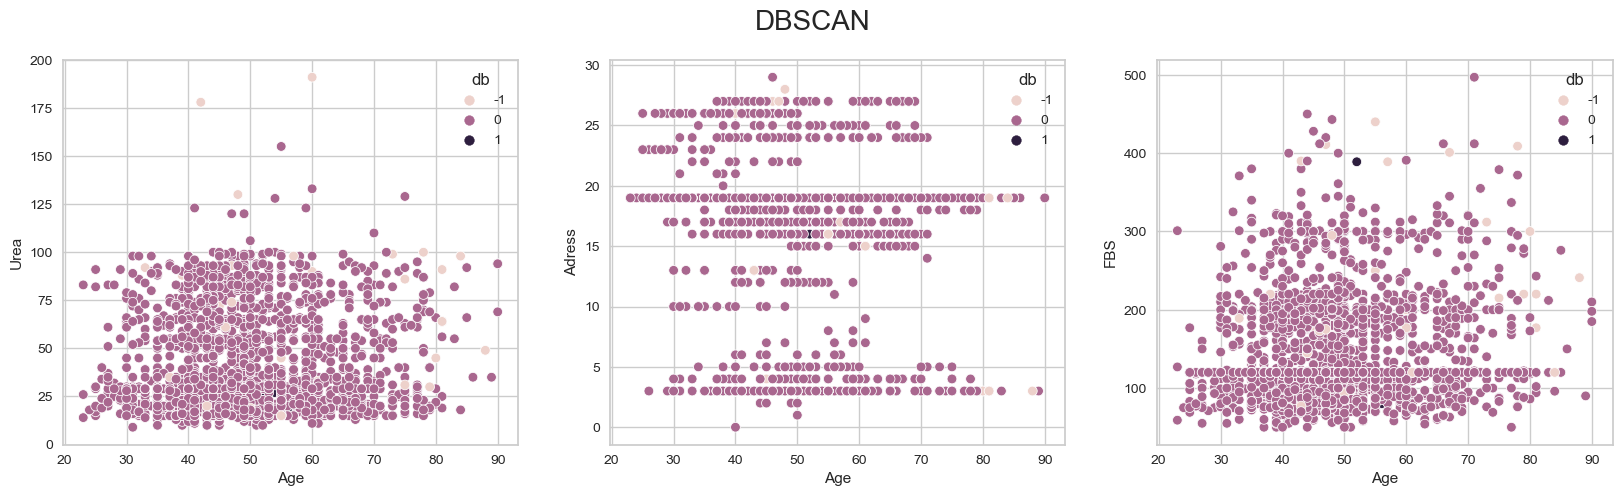

In [21]:
# DBSCAN Result 

plt.figure(figsize=(20, 5))

plt.suptitle('DBSCAN', fontsize=20)

plt.subplot(1, 3, 1)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,4], hue=data['db'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,2], hue=data['db'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,3], hue=data['db'])

## 3.4 Gaussian Mixture Models (GMM)

In [22]:
gmm_labels = GaussianMixture(n_components=2,random_state = 0).fit_predict(scaled_data_std)
data['gmm'] = gmm_labels
gmm_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
data['Gaussian'] = gmm_labels
data.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,K,CL,CLASS,kmeans,agglom,Hierarchical,db,DBSCN,gmm,Gaussian
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,4.50,107.1,0,6,0,0,0,0,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.17,106.4,0,3,0,0,0,0,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,4.00,100.1,0,1,0,0,0,0,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,4.06,107.1,0,1,0,0,0,0,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.00,106.2,0,1,0,0,0,0,0,0


<AxesSubplot:xlabel='Age', ylabel='FBS'>

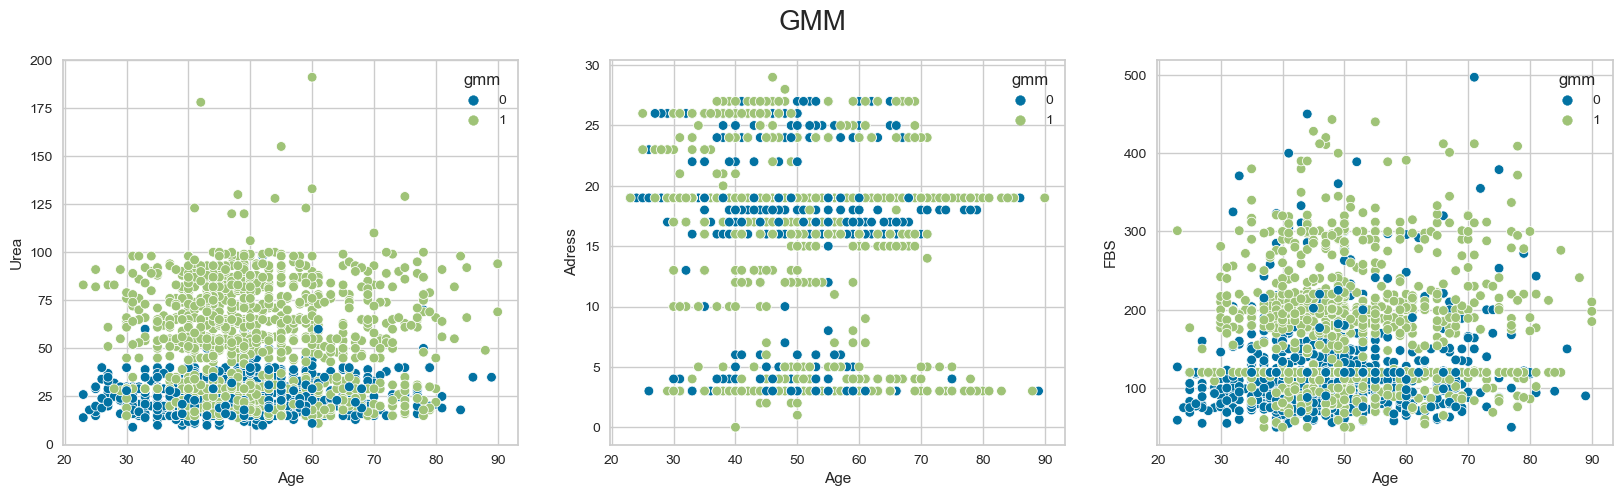

In [24]:
 plt.figure(figsize=(20, 5))

plt.suptitle('GMM', fontsize=20)

plt.subplot(1, 3, 1)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,4], hue=data['gmm'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,2], hue=data['gmm'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,3], hue=data['gmm'])

## 3.5 MiniBatchKMeans

In [25]:
minibatch_labels = MiniBatchKMeans(n_clusters=2 , random_state =42, batch_size=50).fit_predict(scaled_data_std) 

data['minibatch'] = minibatch_labels
minibatch_labels

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [26]:
data['minibatch'] = minibatch_labels
data.head()

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,TCa,GPT,GOT,...,CL,CLASS,kmeans,agglom,Hierarchical,db,DBSCN,gmm,Gaussian,minibatch
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,107.1,0,6,0,0,0,0,0,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,106.4,0,3,0,0,0,0,0,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,100.1,0,1,0,0,0,0,0,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,107.1,0,1,0,0,0,0,0,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,106.2,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Age', ylabel='FBS'>

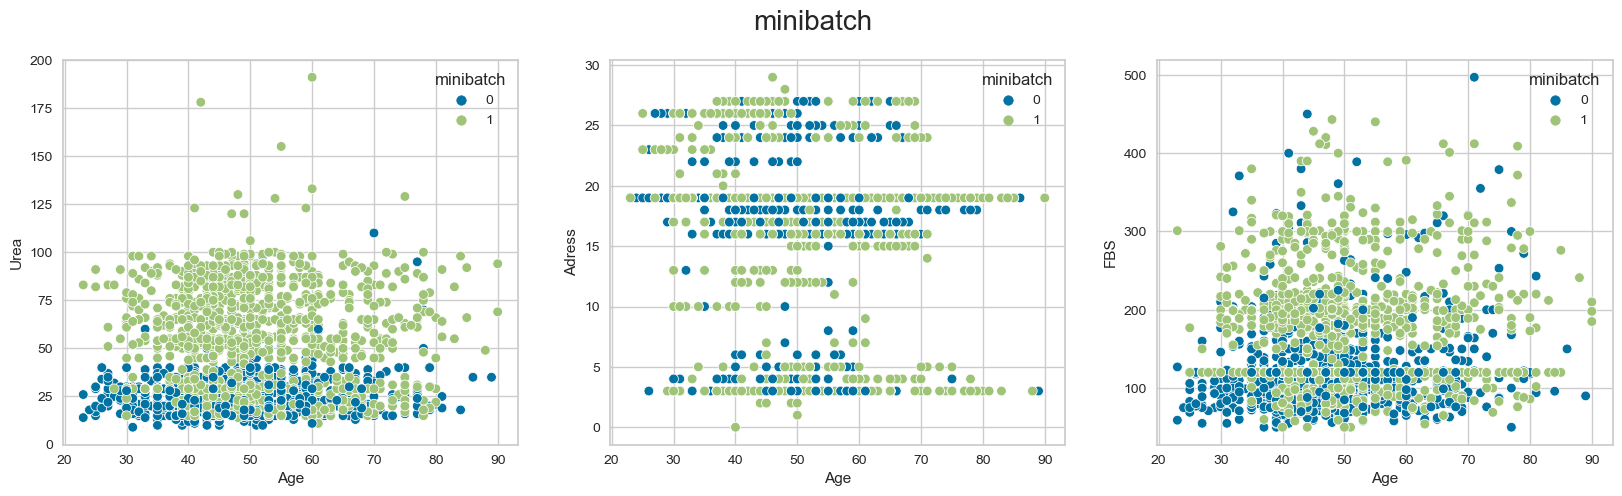

In [27]:
 plt.figure(figsize=(20, 5))

plt.suptitle('minibatch', fontsize=20)

plt.subplot(1, 3, 1)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,4], hue=data['minibatch'])

plt.subplot(1, 3, 2)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,2], hue=data['minibatch'])

plt.subplot(1, 3, 3)
sns.scatterplot(x=data.iloc[:,1], y=data.iloc[:,3], hue=data['minibatch'])

# **4.Cluster validation**

# 4.1 Confusion Matrix for All Models

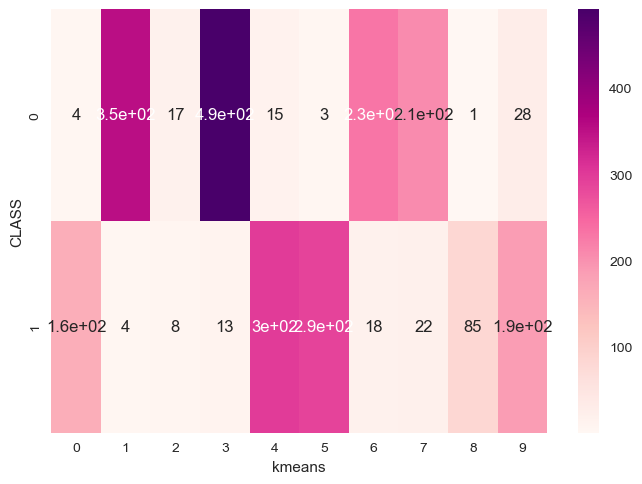

In [28]:
# K-means
confusion_matrix=pd.crosstab(data.CLASS, data.kmeans)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
plt.show()

K-means  confusion_matrix
[[  4 353  17 491  15   3 232 207   1  28]
 [160   4   8  13 298 289  18  22  85 187]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


Text(72.72222222222221, 0.5, 'Acutl')

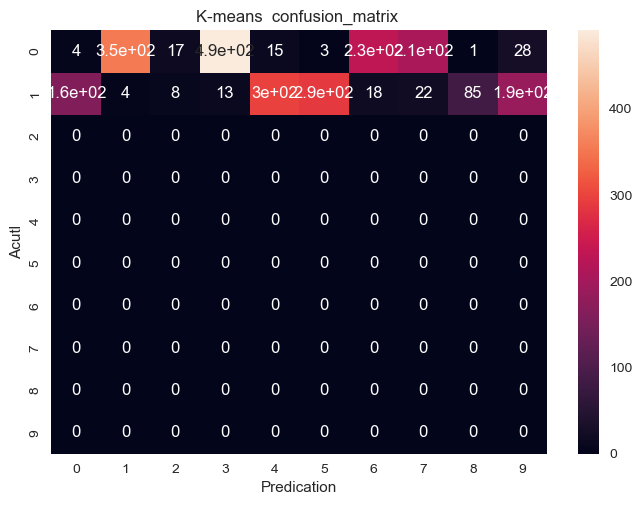

In [29]:
from sklearn.metrics import confusion_matrix

print("K-means  confusion_matrix")

cm=confusion_matrix(data.CLASS, data.kmeans)
#cm=confusion_matrix(y_test,D_classifier.predict(X_test))
TN=cm[0][0]
TP=cm[1][1]
FP=cm[0][1]
FN=cm[1][0]

print(cm)
                            
sns.heatmap(cm,annot=True)
plt.title("K-means  confusion_matrix ")
plt.xlabel("Predication")
plt.ylabel("Acutl")

agglom     0   1
CLASS           
0       1334  17
1       1076   8


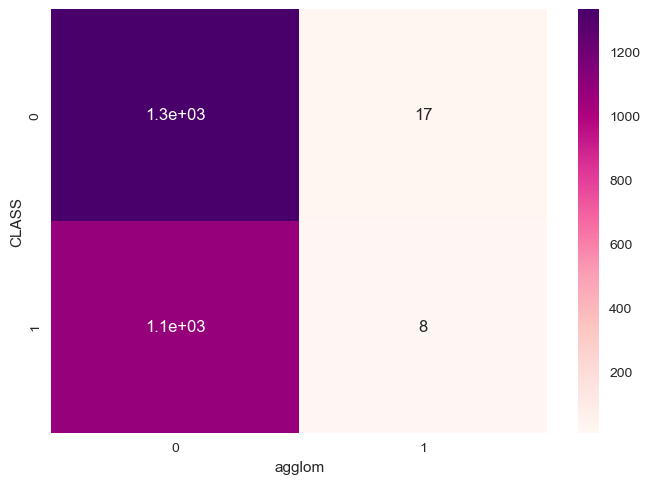

In [30]:
# Hierarchical
confusion_matrix=pd.crosstab(data.CLASS, data.agglom)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

db     -1     0   1
CLASS              
0       3  1331  17
1      39  1045   0


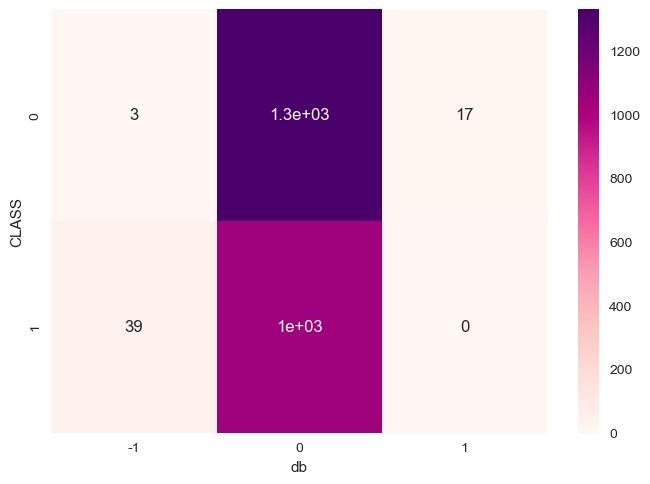

In [31]:
# DBSCAN 
confusion_matrix=pd.crosstab(data.CLASS, data.db)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

gmm       0     1
CLASS            
0      1295    56
1        56  1028


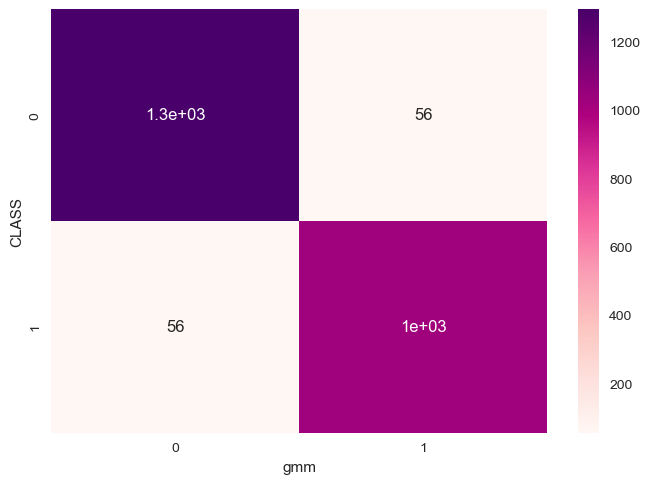

In [32]:
# GMM 
confusion_matrix=pd.crosstab(data.CLASS, data.gmm)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

minibatch     0    1
CLASS               
0          1301   50
1           110  974


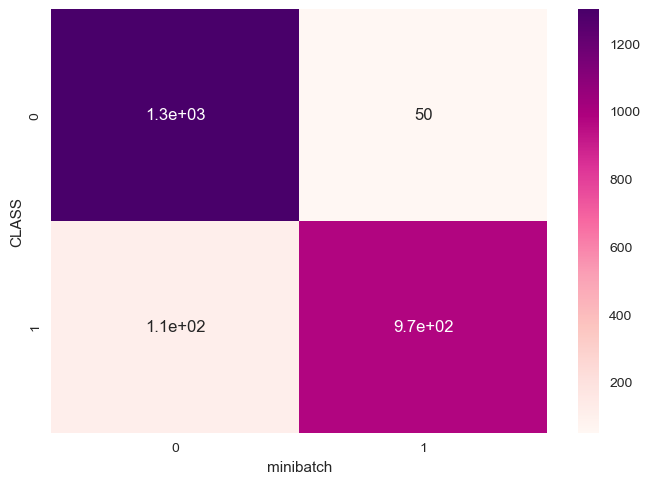

In [33]:
# MiniBatchKMeans 
confusion_matrix=pd.crosstab(data.CLASS, data.minibatch)
sn.heatmap(confusion_matrix, annot=True,cmap='RdPu')
print(confusion_matrix)
plt.show()

# 4.2 Accuracy for All Models 

**3 Index Measurements:**
1. F-meaures
2. Normalized mutual information
3. Rand Statistic

In [34]:
# k-means 
f1_score_kmeans=f1_score(y,kmeans.labels_,average='weighted')
print("F-score: " ,f1_score_kmeans)

mutual_info_score_kmeans=normalized_mutual_info_score(y,kmeans.labels_)
print("Normalized mutual information: ",mutual_info_score_kmeans)

rand_score_kmeans=rand_score(y,kmeans.labels_)
print("Rand Statistic:",rand_score_kmeans)

F-score:  0.005401246991793243
Normalized mutual information:  0.3638783937658764
Rand Statistic: 0.6032739476175131


In [35]:
# Hierarchical 
f1_score_Hierarchical=f1_score(y,agglom.labels_,average='weighted')
print("F-score: " ,f1_score_Hierarchical)

mutual_info_score_Hierarchical=normalized_mutual_info_score(y,agglom.labels_)
print("Normalized mutual information: ",mutual_info_score_Hierarchical)

rand_score_Hierarchical=rand_score(y,agglom.labels_)
print("Rand Statistic:",rand_score_Hierarchical)

F-score:  0.40000802165299654
Normalized mutual information:  0.0009109332120427313
Rand Statistic: 0.5050251485205314


In [36]:
# DBSCAN

f1_score_DBSCAN=f1_score(y,db_labels.labels_,average='weighted')
print("F-score: " ,f1_score_DBSCAN)

mutual_info_score_DBSCAN=normalized_mutual_info_score(y,db_labels.labels_)
print("Normalized mutual information: ",mutual_info_score_DBSCAN)

rand_score_DBSCAN=rand_score(y,db_labels.labels_)
print("Rand Statistic:",rand_score_DBSCAN)

F-score:  0.39628263479388154
Normalized mutual information:  0.0328998630562421
Rand Statistic: 0.5078489367769062


In [37]:
# GMM

f1_score_GMM=f1_score(y,gmm_labels,average='weighted')
print("F-score: " ,f1_score_GMM)

mutual_info_score_GMM=normalized_mutual_info_score(y,gmm_labels)
print("Normalized mutual information: ",mutual_info_score_GMM)

rand_score_GMM=rand_score(y,gmm_labels)
print("Rand Statistic:",rand_score_GMM)

F-score:  0.9540041067761807
Normalized mutual information:  0.7289271622662791
Rand Statistic: 0.912203401841469


In [38]:
# minibatch

f1_score_minibatch=f1_score(y,minibatch_labels,average='weighted')
print("F-score: " ,f1_score_minibatch)

mutual_info_score_minibatch=normalized_mutual_info_score(y,minibatch_labels)
print("Normalized mutual information: ",mutual_info_score_minibatch)

rand_score_minibatch=rand_score(y,gmm_labels)
print("Rand Statistic:",rand_score_minibatch)

F-score:  0.9340701565748236
Normalized mutual information:  0.6529251505771726
Rand Statistic: 0.912203401841469


In [39]:
df12 = pd.DataFrame({'models':['kmeans',
                               'Hierarchical',
                               'dbscan',
                               'gaussian mixture',
                               'MiniBatchKMeans' ,
                               ]
                     
                     ,'f1_score':[f1_score_kmeans,
                                  f1_score_Hierarchical,
                                  f1_score_DBSCAN,
                                  f1_score_GMM,
                                  f1_score_minibatch]
                     
                     ,'Normalized mutual information':[mutual_info_score_kmeans,
                                                 mutual_info_score_Hierarchical,
                                                 mutual_info_score_DBSCAN,
                                                 mutual_info_score_GMM,
                                                 mutual_info_score_minibatch]
                     
                     ,'Rand Statistic':[rand_score_kmeans,
                                        rand_score_Hierarchical,
                                        rand_score_DBSCAN,
                                        rand_score_GMM,
                                        rand_score_minibatch]})
df12

,models,f1_score,Normalized mutual information,Rand Statistic
0,kmeans,0.005401,0.363878,0.603274
1,Hierarchical,0.400008,0.000911,0.505025
2,dbscan,0.396283,0.032900,0.507849
3,gaussian mixture,0.954004,0.728927,0.912203
4,MiniBatchKMeans,0.934070,0.652925,0.912203


Text(0, 0.5, 'scores')

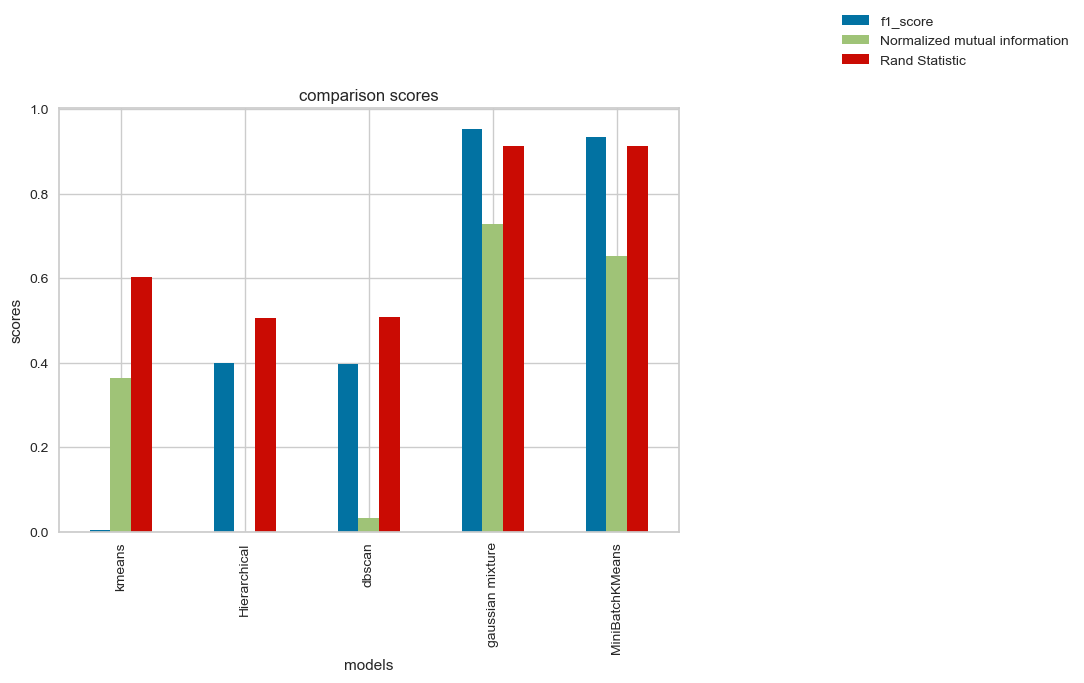

In [40]:
df12.plot( x="models", y=["f1_score","Normalized mutual information","Rand Statistic"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison scores")
plt.xlabel("models")
plt.ylabel("scores")
